In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('C:\\Users\\james\\OneDrive\\바탕 화면\\대학교\\랩인턴\\SNUBH\\AIHUB\\CT_image_classification\\src')

# Dataset

In [3]:
from pathlib import Path
from dataset import CTDataset

ROOT = Path.cwd().parent
DATA_DIR = ROOT / 'data'
TRAIN_IMG_DIR = DATA_DIR / 'Training' / 'image'
TRAIN_LABEL_DIR = DATA_DIR / 'Training' / 'label'
VAL_IMG_DIR = DATA_DIR / 'Validation' / 'image'
VAL_LABEL_DIR = DATA_DIR / 'Validation' / 'label'

print(f"ROOT: {ROOT}")
print(f"TRAIN_IMG_DIR: {TRAIN_IMG_DIR}")
print(f"Exists: {TRAIN_IMG_DIR.exists()}")

ROOT: c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification
TRAIN_IMG_DIR: c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\data\Training\image
Exists: True


In [4]:
train_dataset = CTDataset(
    image_dir=TRAIN_IMG_DIR,
    label_dir=TRAIN_LABEL_DIR,
    #transform=train_transform,
    #target_label=args.target_label
)

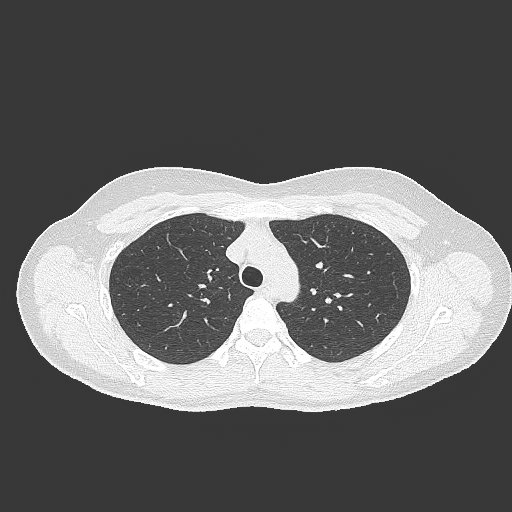

In [42]:
train_dataset[3999][0]

In [43]:
train_dataset[3013][1]

0

# Training pipeline
모듈화된 `src` 컴포넌트를 사용해 CT 분류 모델을 학습합니다.

In [7]:
from pathlib import Path
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

from dataset import CTDataset
from preprocess import get_transforms
from model import build_resnet18_scratch
from train import train_model
from utils import set_seed, get_device

# 경로 및 설정
ROOT = Path.cwd().parent
DATA_DIR = ROOT / 'data_pneumonia'
TRAIN_IMG_DIR = DATA_DIR / 'Training' / 'image'
TRAIN_LABEL_DIR = DATA_DIR / 'Training' / 'label'
VAL_IMG_DIR = DATA_DIR / 'Validation' / 'image'
VAL_LABEL_DIR = DATA_DIR / 'Validation' / 'label'

set_seed(42)
device = get_device()

# 변환
train_tf, val_tf = get_transforms(image_size=224)

# 데이터셋 & 로더
train_ds = CTDataset(TRAIN_IMG_DIR, TRAIN_LABEL_DIR, transform=train_tf, target_label='pneumonia')
val_ds = CTDataset(VAL_IMG_DIR, VAL_LABEL_DIR, transform=val_tf, target_label='pneumonia')

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

print('Train samples:', len(train_ds), train_ds.get_class_distribution())
print('Val samples:', len(val_ds), val_ds.get_class_distribution())

# 모델
model = build_resnet18_scratch(num_classes=2, mlp_hidden=[256], dropout=0.2).to(device)

# 손실/옵티마이저/스케줄러
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 학습
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=10,
    scheduler=scheduler,
    save_path=str(ROOT / 'checkpoints_pneumonia' / 'best_model.pth')
)

history

Train samples: 5000 {'Normal': 4000, 'pneumonia': 1000}
Val samples: 625 {'Normal': 500, 'pneumonia': 125}

Epoch 1/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:29<00:00,  2.95s/it, loss=2.56, acc=80.8]  



Train Loss: 0.3663 | Train Acc: 83.58%
Val Loss: 0.5911 | Val Acc: 80.80%
Val AUROC: 0.9779 | Val F1: 0.0769
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\epoch_0.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\best_model.pth
New best model saved! Accuracy: 80.80%

Epoch 2/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.67s/it, loss=0.368, acc=94.9] 



Train Loss: 0.1475 | Train Acc: 95.04%
Val Loss: 0.1409 | Val Acc: 94.88%
Val AUROC: 0.9845 | Val F1: 0.8596
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\epoch_1.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\best_model.pth
New best model saved! Accuracy: 94.88%

Epoch 3/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:27<00:00,  2.75s/it, loss=0.522, acc=93.3] 



Train Loss: 0.0758 | Train Acc: 97.24%
Val Loss: 0.1896 | Val Acc: 93.28%
Val AUROC: 0.9972 | Val F1: 0.7981
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\epoch_2.pth

Epoch 4/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:28<00:00,  2.80s/it, loss=0.0291, acc=98.6]



Train Loss: 0.0713 | Train Acc: 97.38%
Val Loss: 0.0497 | Val Acc: 98.56%
Val AUROC: 0.9980 | Val F1: 0.9644
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\epoch_3.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\best_model.pth
New best model saved! Accuracy: 98.56%

Epoch 5/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:27<00:00,  2.73s/it, loss=0.00905, acc=96.5]



Train Loss: 0.0565 | Train Acc: 97.80%
Val Loss: 0.0795 | Val Acc: 96.48%
Val AUROC: 0.9989 | Val F1: 0.9185
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\epoch_4.pth

Epoch 6/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:27<00:00,  2.77s/it, loss=0.0548, acc=99.5]



Train Loss: 0.0352 | Train Acc: 98.86%
Val Loss: 0.0194 | Val Acc: 99.52%
Val AUROC: 0.9999 | Val F1: 0.9879
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\epoch_5.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\best_model.pth
New best model saved! Accuracy: 99.52%

Epoch 7/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:28<00:00,  2.85s/it, loss=0.0425, acc=99.4]



Train Loss: 0.0261 | Train Acc: 99.12%
Val Loss: 0.0162 | Val Acc: 99.36%
Val AUROC: 0.9999 | Val F1: 0.9837
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\epoch_6.pth

Epoch 8/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:25<00:00,  2.60s/it, loss=0.0273, acc=99.5]



Train Loss: 0.0189 | Train Acc: 99.36%
Val Loss: 0.0133 | Val Acc: 99.52%
Val AUROC: 1.0000 | Val F1: 0.9880
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\epoch_7.pth

Epoch 9/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:23<00:00,  2.37s/it, loss=0.0372, acc=99.5]



Train Loss: 0.0203 | Train Acc: 99.42%
Val Loss: 0.0133 | Val Acc: 99.52%
Val AUROC: 1.0000 | Val F1: 0.9879
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\epoch_8.pth

Epoch 10/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.60s/it, loss=0.0265, acc=99.7]



Train Loss: 0.0179 | Train Acc: 99.44%
Val Loss: 0.0102 | Val Acc: 99.68%
Val AUROC: 1.0000 | Val F1: 0.9919
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\epoch_9.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\best_model.pth
New best model saved! Accuracy: 99.68%

Training complete! Best Val Accuracy: 99.68%
Results saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints_pneumonia\results.json


{'train_loss': [0.3663445465564728,
  0.14747862757146357,
  0.07578262350559235,
  0.0712823928117752,
  0.05646481825113297,
  0.03522268116660416,
  0.026075522416830064,
  0.01886213956028223,
  0.020314017728716136,
  0.01790841729901731],
 'train_acc': [83.58,
  95.04,
  97.24,
  97.38,
  97.8,
  98.86,
  99.12,
  99.36,
  99.42,
  99.44],
 'val_loss': [0.5911477560997009,
  0.14093117785453796,
  0.18955997411459685,
  0.049728716135025025,
  0.07951927225887775,
  0.019392062401771545,
  0.01623717095851898,
  0.013292076098918915,
  0.01333788400888443,
  0.01016688465178013],
 'val_acc': [80.8,
  94.88,
  93.28,
  98.56,
  96.48,
  99.52,
  99.36,
  99.52,
  99.52,
  99.68],
 'val_auroc': [0.977856,
  0.9844639999999999,
  0.997216,
  0.997968,
  0.9989279999999999,
  0.999904,
  0.99992,
  0.999952,
  0.999984,
  1.0],
 'val_f1': [0.07692307692307693,
  0.8596491228070176,
  0.7980769230769231,
  0.9644268774703557,
  0.9185185185185185,
  0.9878542510121457,
  0.98373983739

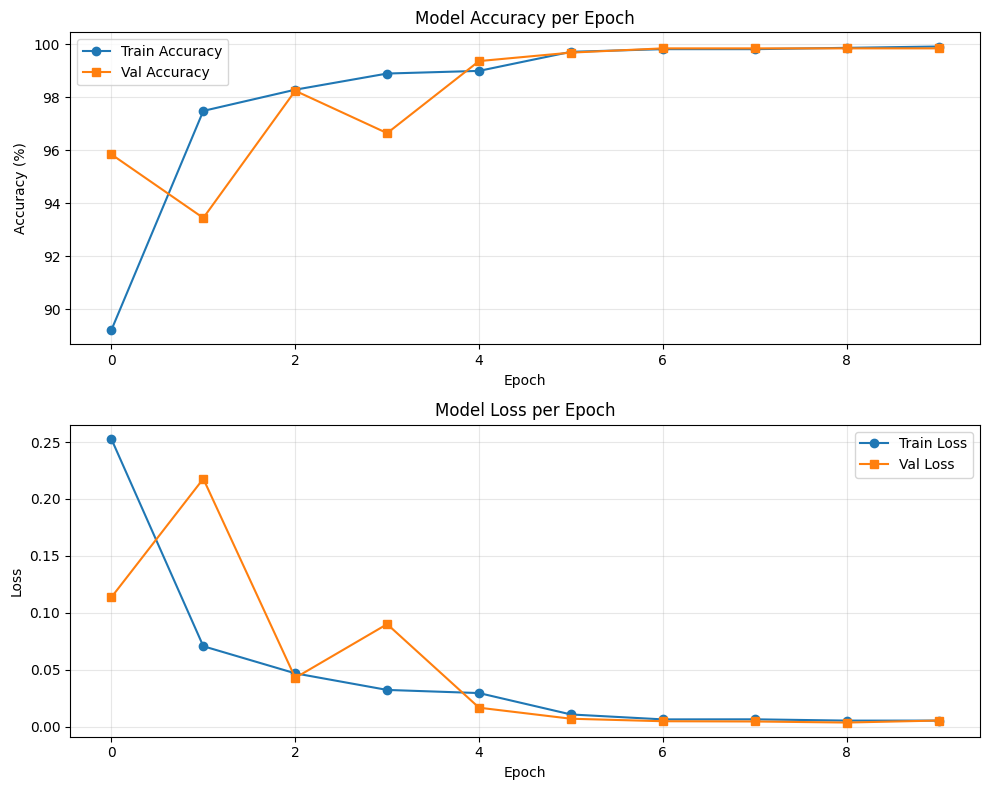

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Accuracy 그래프
axes[0].plot(history['train_acc'], label='Train Accuracy', marker='o')
axes[0].plot(history['val_acc'], label='Val Accuracy', marker='s')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Model Accuracy per Epoch')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss 그래프
axes[1].plot(history['train_loss'], label='Train Loss', marker='o')
axes[1].plot(history['val_loss'], label='Val Loss', marker='s')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Model Loss per Epoch')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
import json

# history를 JSON으로 저장
history_path = ROOT / 'checkpoints' / 'history.json'
history_path.parent.mkdir(parents=True, exist_ok=True)

with open(history_path, 'w') as f:
    json.dump(history, f, indent=4)

print(f"History saved to {history_path}")

History saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\history.json


c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 0: AUROC = 0.9957, F1 Score = 0.9044


c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 1: AUROC = 0.9976, F1 Score = 0.8038


c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 2: AUROC = 0.9994, F1 Score = 0.9544


c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 3: AUROC = 1.0000, F1 Score = 0.9083


c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 4: AUROC = 1.0000, F1 Score = 0.9843


c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 5: AUROC = 1.0000, F1 Score = 0.9920


c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 6: AUROC = 1.0000, F1 Score = 0.9960


c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 7: AUROC = 1.0000, F1 Score = 0.9960


c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 8: AUROC = 1.0000, F1 Score = 0.9960


c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 9: AUROC = 1.0000, F1 Score = 0.9960


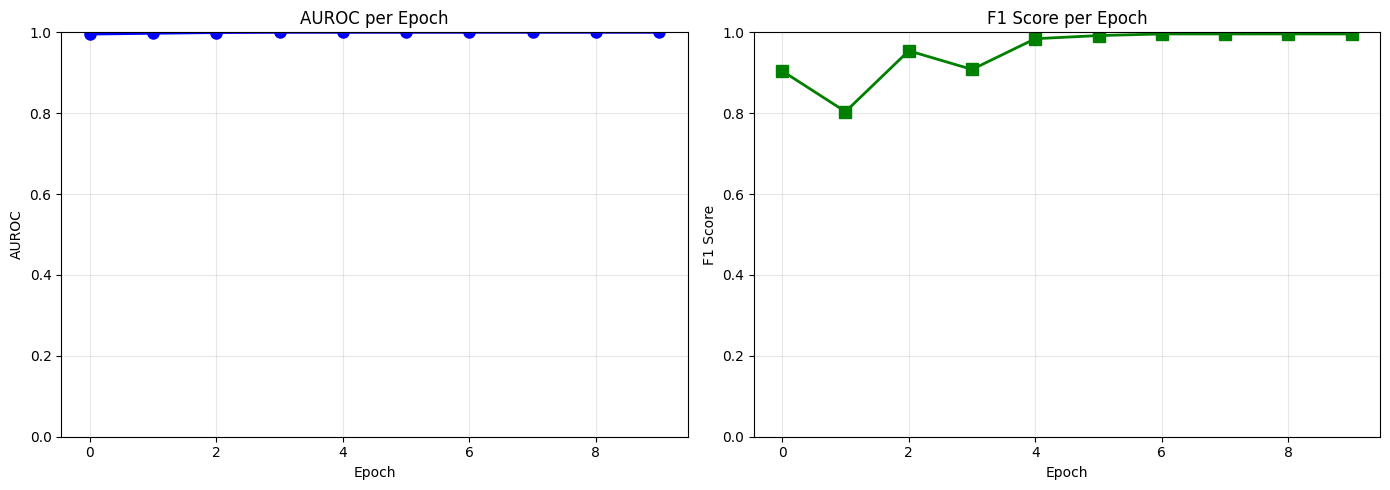


Metrics saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\metrics.json


In [12]:
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc
import numpy as np
from pathlib import Path

checkpoint_dir = ROOT / 'checkpoints'
epoch_files = sorted(checkpoint_dir.glob('epoch_*.pth'))

auroc_scores = []
f1_scores = []
epoch_nums = []

# 각 epoch별 모델 평가
for epoch_file in epoch_files:
    epoch_num = int(epoch_file.stem.split('_')[1])
    
    try:
        from .utils import load_checkpoint
    except ImportError:
        from utils import load_checkpoint
    
    # 모델 로드
    checkpoint = torch.load(epoch_file, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    # Validation 예측
    all_preds = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # positive class probability
            preds = outputs.argmax(dim=1)
            
            all_probs.append(probs.cpu().numpy())
            all_preds.append(preds.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
    
    all_probs = np.concatenate(all_probs)
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    
    # 메트릭 계산
    auroc = roc_auc_score(all_labels, all_probs)
    f1 = f1_score(all_labels, all_preds)
    
    auroc_scores.append(auroc)
    f1_scores.append(f1)
    epoch_nums.append(epoch_num)
    
    print(f"Epoch {epoch_num}: AUROC = {auroc:.4f}, F1 Score = {f1:.4f}")

# 그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# AUROC 그래프
axes[0].plot(epoch_nums, auroc_scores, marker='o', linewidth=2, markersize=8, color='blue')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('AUROC')
axes[0].set_title('AUROC per Epoch')
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0, 1])

# F1 Score 그래프
axes[1].plot(epoch_nums, f1_scores, marker='s', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('F1 Score')
axes[1].set_title('F1 Score per Epoch')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# 결과 저장
metrics = {
    'epochs': epoch_nums,
    'auroc': auroc_scores,
    'f1_score': f1_scores
}

metrics_path = checkpoint_dir / 'metrics.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics, f, indent=4)

print(f"\nMetrics saved to {metrics_path}")

# Training for Pneumothorax
이번에는 Pneumothorax를 target으로 모델을 학습합니다.

In [8]:
from pathlib import Path
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

from dataset import CTDataset
from preprocess import get_transforms
from model import build_resnet18_scratch
from train import train_model
from utils import set_seed, get_device

# 경로 및 설정
ROOT = Path.cwd().parent
DATA_DIR = ROOT / 'data'
TRAIN_IMG_DIR = DATA_DIR / 'Training' / 'image'
TRAIN_LABEL_DIR = DATA_DIR / 'Training' / 'label'
VAL_IMG_DIR = DATA_DIR / 'Validation' / 'image'
VAL_LABEL_DIR = DATA_DIR / 'Validation' / 'label'

set_seed(42)
device = get_device()

# 변환
train_tf, val_tf = get_transforms(image_size=224)

# 데이터셋 & 로더 (target_label='pneumothorax')
train_ds = CTDataset(TRAIN_IMG_DIR, TRAIN_LABEL_DIR, transform=train_tf, target_label='pneumothorax')
val_ds = CTDataset(VAL_IMG_DIR, VAL_LABEL_DIR, transform=val_tf, target_label='pneumothorax')

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

print('Train samples:', len(train_ds), train_ds.get_class_distribution())
print('Val samples:', len(val_ds), val_ds.get_class_distribution())

# 모델
model = build_resnet18_scratch(num_classes=2, mlp_hidden=[256], dropout=0.2).to(device)

# 손실/옵티마이저/스케줄러
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 학습
history_pneumothorax = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=10,
    scheduler=scheduler,
    save_path=str(ROOT / 'checkpoints' / 'pneumothorax_best_model.pth')
)

history_pneumothorax

Train samples: 5000 {'Normal': 4000, 'pneumothorax': 1000}
Val samples: 625 {'Normal': 500, 'pneumothorax': 125}

Epoch 1/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.69s/it, loss=2.24, acc=83.5] 



Train Loss: 0.4397 | Train Acc: 81.26%
Val Loss: 0.4301 | Val Acc: 83.52%
Val AUROC: 0.9370 | Val F1: 0.2993
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_0.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 83.52%

Epoch 2/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.66s/it, loss=0.169, acc=93.8]



Train Loss: 0.2255 | Train Acc: 91.36%
Val Loss: 0.1602 | Val Acc: 93.76%
Val AUROC: 0.9837 | Val F1: 0.8582
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_1.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 93.76%

Epoch 3/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:25<00:00,  2.54s/it, loss=1.04, acc=93.4] 



Train Loss: 0.1267 | Train Acc: 95.42%
Val Loss: 0.2106 | Val Acc: 93.44%
Val AUROC: 0.9799 | Val F1: 0.8038
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_2.pth

Epoch 4/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:25<00:00,  2.52s/it, loss=0.519, acc=97]   



Train Loss: 0.0784 | Train Acc: 97.04%
Val Loss: 0.1042 | Val Acc: 96.96%
Val AUROC: 0.9886 | Val F1: 0.9198
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_3.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 96.96%

Epoch 5/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.69s/it, loss=0.0495, acc=96] 



Train Loss: 0.0694 | Train Acc: 97.38%
Val Loss: 0.1171 | Val Acc: 96.00%
Val AUROC: 0.9958 | Val F1: 0.9064
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_4.pth

Epoch 6/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.66s/it, loss=0.0753, acc=98.7]



Train Loss: 0.0388 | Train Acc: 98.70%
Val Loss: 0.0403 | Val Acc: 98.72%
Val AUROC: 0.9980 | Val F1: 0.9677
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_5.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 98.72%

Epoch 7/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.65s/it, loss=0.0625, acc=98.6]



Train Loss: 0.0295 | Train Acc: 98.98%
Val Loss: 0.0441 | Val Acc: 98.56%
Val AUROC: 0.9979 | Val F1: 0.9636
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_6.pth

Epoch 8/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.63s/it, loss=0.188, acc=98.6] 



Train Loss: 0.0265 | Train Acc: 99.12%
Val Loss: 0.0504 | Val Acc: 98.56%
Val AUROC: 0.9974 | Val F1: 0.9630
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_7.pth

Epoch 9/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:27<00:00,  2.76s/it, loss=0.12, acc=98.9]  



Train Loss: 0.0244 | Train Acc: 99.08%
Val Loss: 0.0430 | Val Acc: 98.88%
Val AUROC: 0.9979 | Val F1: 0.9717
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_8.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 98.88%

Epoch 10/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:24<00:00,  2.47s/it, loss=0.112, acc=98.9] 



Train Loss: 0.0217 | Train Acc: 99.34%
Val Loss: 0.0413 | Val Acc: 98.88%
Val AUROC: 0.9984 | Val F1: 0.9717
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_9.pth

Training complete! Best Val Accuracy: 98.88%
Results saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\results.json


{'train_loss': [0.43967321228981016,
  0.22545471631884575,
  0.1266730484366417,
  0.07844448900818825,
  0.06942106471657752,
  0.03875836909264326,
  0.02952659093365073,
  0.026460413513705136,
  0.024371022149920464,
  0.021739199172705413],
 'train_acc': [81.26,
  91.36,
  95.42,
  97.04,
  97.38,
  98.7,
  98.98,
  99.12,
  99.08,
  99.34],
 'val_loss': [0.43008914499282835,
  0.1602408669948578,
  0.21055153707265853,
  0.10415337278842926,
  0.11707707859873771,
  0.04030430735349655,
  0.04409772752523422,
  0.050423639965057374,
  0.04298934547901154,
  0.04132377574443817],
 'val_acc': [83.52,
  93.76,
  93.44,
  96.96,
  96.0,
  98.72,
  98.56,
  98.56,
  98.88,
  98.88],
 'val_auroc': [0.93696,
  0.983712,
  0.9798879999999999,
  0.988608,
  0.99576,
  0.997984,
  0.997904,
  0.997408,
  0.997888,
  0.9984160000000001],
 'val_f1': [0.29931972789115646,
  0.8581818181818182,
  0.8038277511961722,
  0.919831223628692,
  0.9063670411985019,
  0.967741935483871,
  0.963562753

# lung cancer

In [9]:
from pathlib import Path
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

from dataset import CTDataset
from preprocess import get_transforms
from model import build_resnet18_scratch
from train import train_model
from utils import set_seed, get_device

# 경로 및 설정
ROOT = Path.cwd().parent
DATA_DIR = ROOT / 'data'
TRAIN_IMG_DIR = DATA_DIR / 'Training' / 'image'
TRAIN_LABEL_DIR = DATA_DIR / 'Training' / 'label'
VAL_IMG_DIR = DATA_DIR / 'Validation' / 'image'
VAL_LABEL_DIR = DATA_DIR / 'Validation' / 'label'

set_seed(42)
device = get_device()

# 변환
train_tf, val_tf = get_transforms(image_size=224)

# 데이터셋 & 로더 (target_label='Lung_Cancer')
train_ds = CTDataset(TRAIN_IMG_DIR, TRAIN_LABEL_DIR, transform=train_tf, target_label='Lung_Cancer')
val_ds = CTDataset(VAL_IMG_DIR, VAL_LABEL_DIR, transform=val_tf, target_label='Lung_Cancer')

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

print('Train samples:', len(train_ds), train_ds.get_class_distribution())
print('Val samples:', len(val_ds), val_ds.get_class_distribution())

# 모델
model = build_resnet18_scratch(num_classes=2, mlp_hidden=[256], dropout=0.2).to(device)

# 손실/옵티마이저/스케줄러
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 학습
history_Lung_Cancer = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=10,
    scheduler=scheduler,
    save_path=str(ROOT / 'checkpoints' / 'Lung_Cancer_best_model.pth')
)

history_Lung_Cancer

Train samples: 5000 {'Normal': 4000, 'Lung_Cancer': 1000}
Val samples: 625 {'Normal': 500, 'Lung_Cancer': 125}

Epoch 1/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:28<00:00,  2.82s/it, loss=0.0103, acc=81.6]



Train Loss: 0.4396 | Train Acc: 80.54%
Val Loss: 0.3431 | Val Acc: 81.60%
Val AUROC: 0.9673 | Val F1: 0.1481
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_0.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 81.60%

Epoch 2/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.66s/it, loss=0.0363, acc=96.8]



Train Loss: 0.2014 | Train Acc: 92.28%
Val Loss: 0.1002 | Val Acc: 96.80%
Val AUROC: 0.9949 | Val F1: 0.9231
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_1.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 96.80%

Epoch 3/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.69s/it, loss=0.00257, acc=97.4]



Train Loss: 0.1087 | Train Acc: 96.02%
Val Loss: 0.0573 | Val Acc: 97.44%
Val AUROC: 0.9984 | Val F1: 0.9322
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_2.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 97.44%

Epoch 4/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:29<00:00,  3.00s/it, loss=0.00262, acc=96.3]



Train Loss: 0.0760 | Train Acc: 97.40%
Val Loss: 0.0801 | Val Acc: 96.32%
Val AUROC: 0.9987 | Val F1: 0.8987
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_3.pth

Epoch 5/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:29<00:00,  2.90s/it, loss=0.0395, acc=97.4]



Train Loss: 0.0631 | Train Acc: 97.74%
Val Loss: 0.0841 | Val Acc: 97.44%
Val AUROC: 0.9989 | Val F1: 0.9398
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_4.pth

Epoch 6/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:32<00:00,  3.25s/it, loss=0.00541, acc=99.5]



Train Loss: 0.0426 | Train Acc: 98.44%
Val Loss: 0.0208 | Val Acc: 99.52%
Val AUROC: 0.9999 | Val F1: 0.9881
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_5.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 99.52%

Epoch 7/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:28<00:00,  2.87s/it, loss=0.00648, acc=99.5]



Train Loss: 0.0291 | Train Acc: 99.08%
Val Loss: 0.0216 | Val Acc: 99.52%
Val AUROC: 0.9999 | Val F1: 0.9881
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_6.pth

Epoch 8/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:29<00:00,  2.90s/it, loss=0.00116, acc=99.7]



Train Loss: 0.0342 | Train Acc: 98.94%
Val Loss: 0.0146 | Val Acc: 99.68%
Val AUROC: 0.9999 | Val F1: 0.9920
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_7.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 99.68%

Epoch 9/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:30<00:00,  3.05s/it, loss=0.00185, acc=99.8]



Train Loss: 0.0236 | Train Acc: 99.36%
Val Loss: 0.0122 | Val Acc: 99.84%
Val AUROC: 0.9999 | Val F1: 0.9960
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_8.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 99.84%

Epoch 10/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:30<00:00,  3.01s/it, loss=0.00139, acc=99.7]



Train Loss: 0.0208 | Train Acc: 99.48%
Val Loss: 0.0106 | Val Acc: 99.68%
Val AUROC: 0.9999 | Val F1: 0.9920
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_9.pth

Training complete! Best Val Accuracy: 99.84%
Results saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\results.json


{'train_loss': [0.43964847793579104,
  0.20141613711118697,
  0.10873777689933777,
  0.07602474492788315,
  0.06312627351284027,
  0.042595958015322684,
  0.029095949187874795,
  0.03418443514704704,
  0.02357619578242302,
  0.02083654747903347],
 'train_acc': [80.54,
  92.28,
  96.02,
  97.4,
  97.74,
  98.44,
  99.08,
  98.94,
  99.36,
  99.48],
 'val_loss': [0.3431326500624418,
  0.10021148118376731,
  0.05725633947961033,
  0.08014261017180979,
  0.0840625733435154,
  0.02082042137160897,
  0.021593055974692105,
  0.014627351753413677,
  0.0121864294199273,
  0.010591343040950597],
 'val_acc': [81.6,
  96.8,
  97.44,
  96.32,
  97.44,
  99.52,
  99.52,
  99.68,
  99.84,
  99.68],
 'val_auroc': [0.9672639999999999,
  0.994928,
  0.998416,
  0.998688,
  0.9989439999999999,
  0.999856,
  0.999872,
  0.999888,
  0.999888,
  0.999888],
 'val_f1': [0.14814814814814814,
  0.9230769230769231,
  0.9322033898305084,
  0.8986784140969163,
  0.9398496240601504,
  0.9881422924901185,
  0.988142

# ILD

In [10]:
from pathlib import Path
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

from dataset import CTDataset
from preprocess import get_transforms
from model import build_resnet18_scratch
from train import train_model
from utils import set_seed, get_device

# 경로 및 설정
ROOT = Path.cwd().parent
DATA_DIR = ROOT / 'data'
TRAIN_IMG_DIR = DATA_DIR / 'Training' / 'image'
TRAIN_LABEL_DIR = DATA_DIR / 'Training' / 'label'
VAL_IMG_DIR = DATA_DIR / 'Validation' / 'image'
VAL_LABEL_DIR = DATA_DIR / 'Validation' / 'label'

set_seed(42)
device = get_device()

# 변환
train_tf, val_tf = get_transforms(image_size=224)

# 데이터셋 & 로더 (target_label='ILD')
train_ds = CTDataset(TRAIN_IMG_DIR, TRAIN_LABEL_DIR, transform=train_tf, target_label='ILD')
val_ds = CTDataset(VAL_IMG_DIR, VAL_LABEL_DIR, transform=val_tf, target_label='ILD')

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

print('Train samples:', len(train_ds), train_ds.get_class_distribution())
print('Val samples:', len(val_ds), val_ds.get_class_distribution())

# 모델
model = build_resnet18_scratch(num_classes=2, mlp_hidden=[256], dropout=0.2).to(device)

# 손실/옵티마이저/스케줄러
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# 학습
history_ILD = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=10,
    scheduler=scheduler,
    save_path=str(ROOT / 'checkpoints' / 'ILD_best_model.pth')
)

history_ILD

Train samples: 5000 {'Normal': 4000, 'ILD': 1000}
Val samples: 625 {'Normal': 500, 'ILD': 125}

Epoch 1/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:33<00:00,  3.31s/it, loss=0.215, acc=89.3]



Train Loss: 0.2605 | Train Acc: 90.54%
Val Loss: 0.2311 | Val Acc: 89.28%
Val AUROC: 0.9990 | Val F1: 0.7886
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_0.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 89.28%

Epoch 2/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:31<00:00,  3.13s/it, loss=0.00037, acc=99]  



Train Loss: 0.0314 | Train Acc: 99.16%
Val Loss: 0.0381 | Val Acc: 99.04%
Val AUROC: 0.9998 | Val F1: 0.9754
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_1.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 99.04%

Epoch 3/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:34<00:00,  3.50s/it, loss=0.00447, acc=99.5]



Train Loss: 0.0166 | Train Acc: 99.46%
Val Loss: 0.0194 | Val Acc: 99.52%
Val AUROC: 1.0000 | Val F1: 0.9881
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_2.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 99.52%

Epoch 4/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:33<00:00,  3.39s/it, loss=0.122, acc=97.9] 



Train Loss: 0.0072 | Train Acc: 99.80%
Val Loss: 0.0584 | Val Acc: 97.92%
Val AUROC: 1.0000 | Val F1: 0.9506
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_3.pth

Epoch 5/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:31<00:00,  3.11s/it, loss=0.312, acc=88]   



Train Loss: 0.0058 | Train Acc: 99.88%
Val Loss: 0.3018 | Val Acc: 88.00%
Val AUROC: 1.0000 | Val F1: 0.7692
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_4.pth

Epoch 6/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.70s/it, loss=0.000102, acc=100]



Train Loss: 0.0049 | Train Acc: 99.84%
Val Loss: 0.0008 | Val Acc: 100.00%
Val AUROC: 1.0000 | Val F1: 1.0000
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_5.pth
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\best_model.pth
New best model saved! Accuracy: 100.00%

Epoch 7/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:26<00:00,  2.64s/it, loss=0.00041, acc=100]



Train Loss: 0.0010 | Train Acc: 100.00%
Val Loss: 0.0011 | Val Acc: 100.00%
Val AUROC: 1.0000 | Val F1: 1.0000
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_6.pth

Epoch 8/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:35<00:00,  3.55s/it, loss=0.000112, acc=100]



Train Loss: 0.0023 | Train Acc: 99.96%
Val Loss: 0.0005 | Val Acc: 100.00%
Val AUROC: 1.0000 | Val F1: 1.0000
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_7.pth

Epoch 9/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:47<00:00,  4.71s/it, loss=0.000111, acc=100]



Train Loss: 0.0016 | Train Acc: 99.96%
Val Loss: 0.0005 | Val Acc: 100.00%
Val AUROC: 1.0000 | Val F1: 1.0000
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_8.pth

Epoch 10/10
--------------------------------------------------


Training:   0%|          | 0/79 [00:00<?, ?it/s]c:\Users\james\anaconda3\envs\snubh\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
Validation: 100%|██████████| 10/10 [00:31<00:00,  3.12s/it, loss=0.000125, acc=100]



Train Loss: 0.0013 | Train Acc: 99.96%
Val Loss: 0.0004 | Val Acc: 100.00%
Val AUROC: 1.0000 | Val F1: 1.0000
Checkpoint saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\epoch_9.pth

Training complete! Best Val Accuracy: 100.00%
Results saved to c:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\checkpoints\results.json


{'train_loss': [0.2605471179842949,
  0.03140575037002563,
  0.016620746402442457,
  0.007208572318777442,
  0.005792003238573671,
  0.004913207705691457,
  0.0010272459603846073,
  0.0022849118346348406,
  0.0016052512794733048,
  0.0012936083246022463],
 'train_acc': [90.54,
  99.16,
  99.46,
  99.8,
  99.88,
  99.84,
  100.0,
  99.96,
  99.96,
  99.96],
 'val_loss': [0.23105755891799926,
  0.03805177317587659,
  0.0193885913439095,
  0.05835883242189884,
  0.3018323674187064,
  0.0007886957554495893,
  0.0011267176168505103,
  0.00045309978561708706,
  0.00045777273719431835,
  0.0003927937471540645],
 'val_acc': [89.28,
  99.04,
  99.52,
  97.92,
  88.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 'val_auroc': [0.9990399999999999,
  0.99984,
  0.999952,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_f1': [0.7886435331230284,
  0.9754098360655737,
  0.9881422924901185,
  0.9505703422053232,
  0.7692307692307693,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

In [11]:
model

CTClassifier(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stages): ModuleList(
    (0): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_